In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os

In [6]:
oil_img0=Image.open("D:/PhD/2021 data/DATASETS_for_PhD_work/new dataset/Dataset_oil_spill_new/Train/with oil spills/img_0001.jpg")
withoutoil_img1=Image.open("D:/PhD/2021 data/DATASETS_for_PhD_work/new dataset/Dataset_oil_spill_new/Train/without oil spills/img_0027.jpg")

Text(0.5, 1.0, 'With oil')

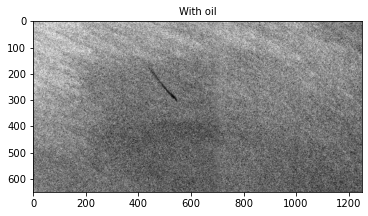

In [7]:
fig = plt.figure(figsize=(20,9))

# Add Subplotting to display multiple images
a1 = fig.add_subplot(1, 3, 1)
img_plot = plt.imshow(oil_img0)
a1.set_title("With oil", fontsize = 10)

Image data augmentation

In [8]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from numpy import expand_dims

In [10]:
img = load_img("D:/PhD/2021 data/DATASETS_for_PhD_work/new dataset/Dataset_oil_spill_new/Train/with oil spills/img_0014.jpg")

In [11]:
data = img_to_array(img)
# axis = 0, rowwise , axis = 1 (columnwise)
samples = expand_dims(data, axis = 0)

In [12]:
samples.shape

(1, 650, 1250, 3)

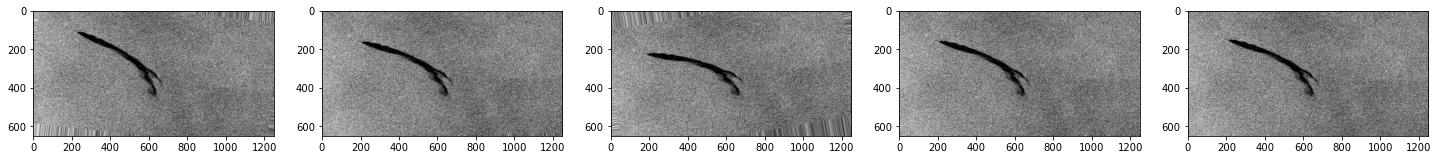

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [13]:
# Rotation of Image
datagen = ImageDataGenerator(rotation_range = 10, fill_mode='nearest')
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1,5, figsize = (25, 10))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show()

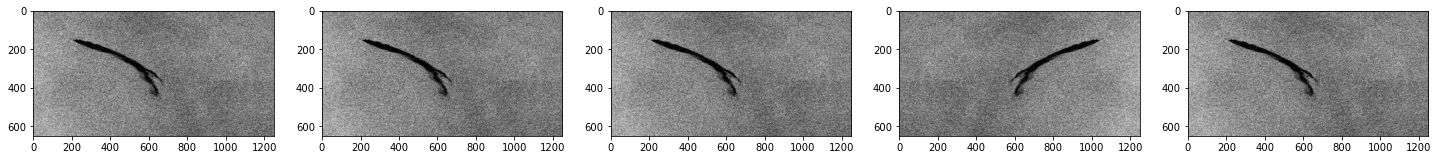

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [14]:
# Horizontal flip of Image
datagen = ImageDataGenerator(horizontal_flip = True, fill_mode='nearest')
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1,5, figsize = (25, 10))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show() 

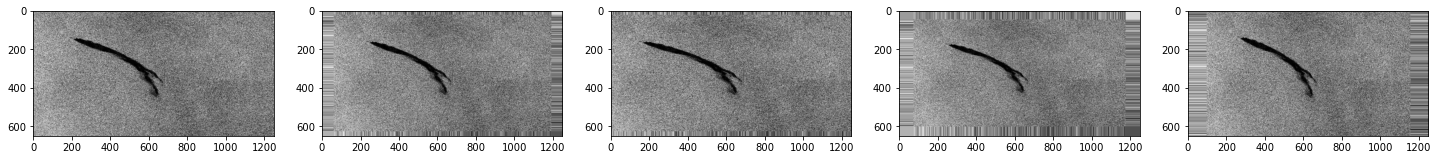

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [15]:
# Zoom Range Transformation of Image Data
datagen = ImageDataGenerator(zoom_range = 0.2, fill_mode='nearest')
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1,5, figsize = (25, 10))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show() 

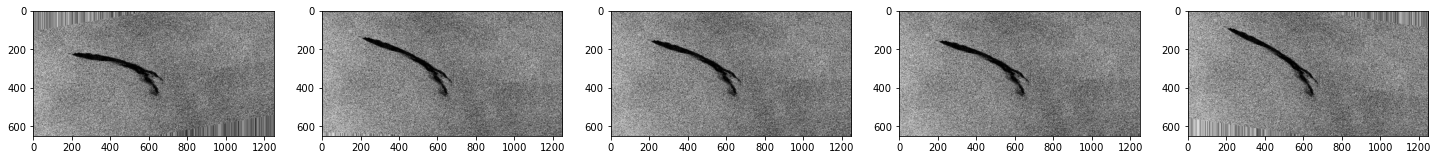

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [16]:
# Shear Transformation of Image Data
datagen = ImageDataGenerator(shear_range = 10, fill_mode='nearest')
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1,5, figsize = (25, 10))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show()

In [17]:
# Image Transformation , Image Pixel Normalization (0,1)
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=10, zoom_range=0.2, shear_range=10, horizontal_flip=True,
                                  fill_mode='nearest')
# Test Data Generator
test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# alternative class_mode = 'categorical'
training_set = train_datagen.flow_from_directory('D:/PhD/2021 data/DATASETS_for_PhD_work/new dataset/Dataset_oil_spill_new/Train/', 
                                                 target_size=(224,224), batch_size=16, 
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('D:/PhD/2021 data/DATASETS_for_PhD_work/new dataset/Dataset_oil_spill_new/Test/', 
                                                 target_size=(224,224), batch_size=16, 
                                                 class_mode='binary')

Found 200 images belonging to 2 classes.
Found 44 images belonging to 2 classes.


In [19]:
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [20]:
def build_model():
    # FeedForward NN
    model = Sequential()
    # Input Layer
    # filters = Similar to number of Neurons, kernel_size = (3,3), strides = (1,1), padding = 'same'(zero padding), activation = 'relu'
    model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu',
                    input_shape = (224,224,3)))
    # MaxPooling
    model.add(MaxPooling2D())
    
    # Conv2D - II
    model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
    # MaxPooling
    model.add(MaxPooling2D())
    
    # Conv2D - III
    model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
    # MaxPooling
    model.add(MaxPooling2D())
    
    # Flatten Layer
    model.add(Flatten())
    # Fully Connected Layer
    model.add(Dense(units = 128, activation = 'relu'))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    # Optimizers
    optimizers = Adam(learning_rate = 0.0001)
    
    # Model Compiler
    model.compile(loss = 'binary_crossentropy', optimizer = optimizers, metrics = ['accuracy'])
    return model

In [21]:
model = build_model()

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [23]:
# save best model
from tensorflow.keras import callbacks
filepath = "D:/New folder/paper 001/oilspill_cnn_17may2022.hdf5"
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', save_best_model = True, mode = 'min', verbose = 1)
checkpoint

In [24]:
history = model.fit(training_set, validation_data = test_set, epochs=30, callbacks = [checkpoint], verbose = 1)

Epoch 1/30
13/13 [==============================] - ETA: 0s - loss: 0.7819 - accuracy: 0.4700
Epoch 00001: saving model to D:/New folder/paper 001\oilspill_cnn_17may2022.hdf5
13/13 [==============================] - 14s 1000ms/step - loss: 0.7819 - accuracy: 0.4700 - val_loss: 0.6992 - val_accuracy: 0.5000
Epoch 2/30
13/13 [==============================] - ETA: 0s - loss: 0.6918 - accuracy: 0.5000
Epoch 00002: saving model to D:/New folder/paper 001\oilspill_cnn_17may2022.hdf5
13/13 [==============================] - 11s 796ms/step - loss: 0.6918 - accuracy: 0.5000 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 3/30
13/13 [==============================] - ETA: 0s - loss: 0.6900 - accuracy: 0.5000
Epoch 00003: saving model to D:/New folder/paper 001\oilspill_cnn_17may2022.hdf5
13/13 [==============================] - 11s 811ms/step - loss: 0.6900 - accuracy: 0.5000 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 4/30
13/13 [==============================] - ETA: 0s - loss: 0.6910 - a

In [25]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.781897,0.470,0.699151,0.500000
1,0.691795,0.500,0.692354,0.500000
2,0.690006,0.500,0.690895,0.500000
3,0.691033,0.525,0.690072,0.500000
4,0.688377,0.510,0.692342,0.500000
5,0.687914,0.555,0.690377,0.500000
6,0.683973,0.505,0.691057,0.522727
7,0.680578,0.555,0.687915,0.500000
8,0.674137,0.590,0.696491,0.568182
9,0.660782,0.575,0.720233,0.568182


<AxesSubplot:>

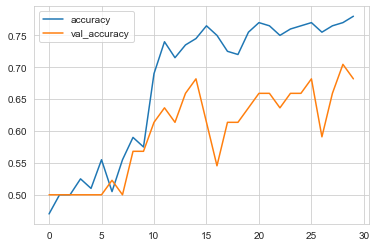

In [26]:
import seaborn as sns
sns.set_style('whitegrid')
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

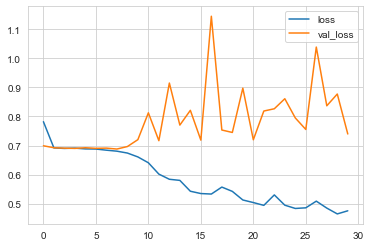

In [27]:
import seaborn as sns
sns.set_style('whitegrid')
pd.DataFrame(history.history)[['loss','val_loss']].plot()

In [28]:
model.load_weights("D:/New folder/paper 001/oilspill_cnn_17may2022.hdf5")

In [29]:
predictions = model.predict(test_set)

In [30]:
yhat = np.round(predictions)

In [31]:
model.evaluate(test_set)

3/3 [==============================] - 1s 176ms/step - loss: 0.7397 - accuracy: 0.6818


[0.7396737933158875, 0.6818181872367859]

In [32]:
test_set.class_indices

{'with oil spills': 0, 'without oil spills': 1}

In [33]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(test_set.classes, yhat)

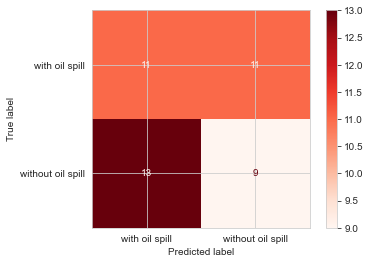

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

labels = ["with oil spill", "without oil spill"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Reds)
plt.show()